In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import torch

In [5]:
# Generate synthetic data
X, y = make_blobs(n_samples=600, centers=2, cluster_std=1, random_state=42)

# Convert to pandas DataFrame for easier viewing
data = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
data['TrueLabel'] = y
data.head()

,Feature1,Feature2,TrueLabel
0,-2.484687,9.512284,0
1,5.048132,0.270586,1
2,-1.351087,9.805949,0
3,-2.422608,8.858609,0
4,-3.474121,9.700338,0


In [6]:
# Initialize KMeans
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit KMeans to the data
kmeans.fit(X)

# Predict cluster labels
data['KMeansLabel'] = kmeans.predict(X)
data.head()

C:\Users\laroc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,Feature1,Feature2,TrueLabel,KMeansLabel
0,-2.484687,9.512284,0,1
1,5.048132,0.270586,1,0
2,-1.351087,9.805949,0,1
3,-2.422608,8.858609,0,1
4,-3.474121,9.700338,0,1


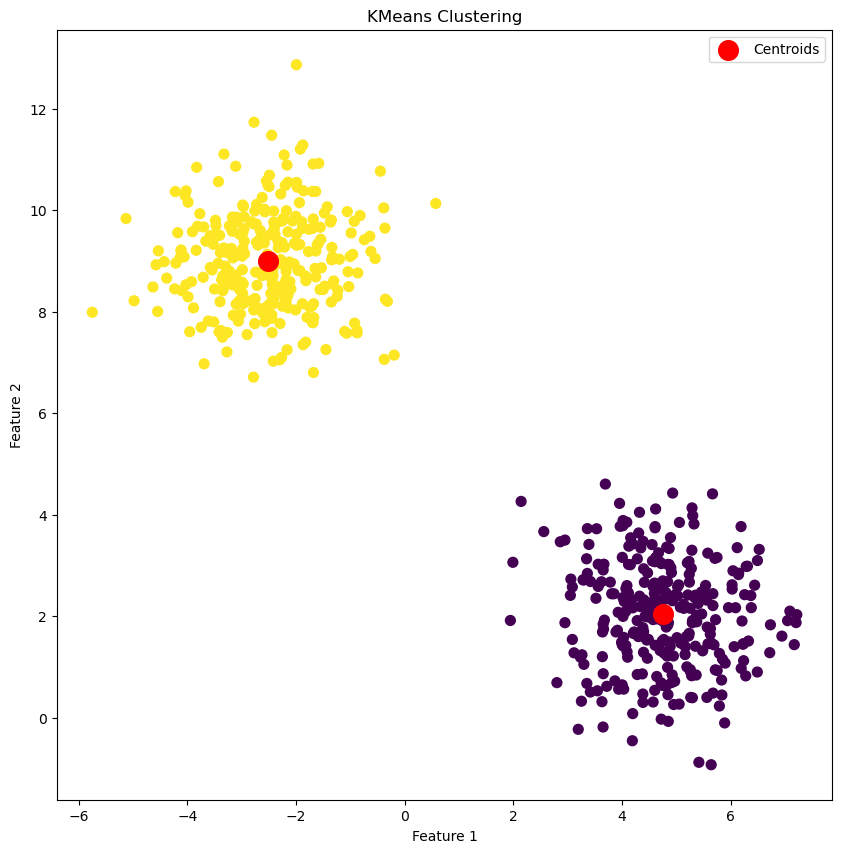

In [7]:
# Plotting the clusters
plt.figure(figsize=(10,10))
plt.scatter(data['Feature1'], data['Feature2'], c=data['KMeansLabel'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker='.', s=800, label='Centroids')
plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()